<a href="https://colab.research.google.com/github/mdaugherity/Numerical2022/blob/main/ode/Week_10_solveivp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 351, Fall 2022**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# How to use solve_ivp

You need to specify 3 parameters:
```
solve_ivp(fun, t_span, y0)
```
* fun must take (t,y) where y is scalar or array and return derivatives
* t_span = [t0, tf] 
* y0 is **array** of initial values (it will not accept scalars)


Other advice: 
* always check the message or success variable
* start with RK45 method (or DOP853 for high precision), if it fails try BDF




https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html 


# EXAMPLE 1 - Simple exponential

$y'(t) = ky$ with an exact solution of  $y(t) = y_0e^{kt}$

This is a step-by-step walkthrough of what solve_ivp does

In [50]:
def f(t,y):
  k = 1
  return k*y   # returns derivative of y

y0 = 1
sol = solve_ivp(f, [0,5],[y0])
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.10001999, 1.06609106, 2.30431769, 3.64528981,
       5.        ])
 t_events: None
        y: array([[  1.        ,   1.10519301,   2.9040598 ,  10.01740317,
         38.29174533, 148.39440874]])
 y_events: None


In [51]:
# always check the message (or least the success)
print(sol.message)

The solver successfully reached the end of the integration interval.


In [52]:
# The results are in the t and y variables
t_ivp = sol.t
y_ivp = sol.y[0]  # y is always a 2D array!
print(t_ivp)
print(y_ivp)

[0.         0.10001999 1.06609106 2.30431769 3.64528981 5.        ]
[  1.           1.10519301   2.9040598   10.01740317  38.29174533
 148.39440874]


Notice the steps that *solve_ivp* takes.

Include Euler's method for comparison plots below

In [53]:
def euler(f,t,y0):
  '''
  Finds y from Euler's Method.  
  INPUT: f(t,y) = function of derivatives; t = array of times; y0 = initial value
  '''
  y = np.zeros_like(t)
  y[0] = y0

  for i in range(len(t)-1):
    y[i+1] = y[i] + (t[i+1]-t[i])*f(t[i],y[i])

  return y

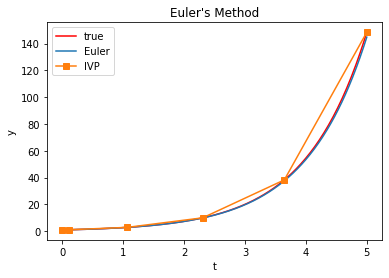

In [55]:
t = np.linspace(0, 5, num=500)
y0 = 1
y = euler(f,t,y0)

# Exact
tsol = np.linspace(0,5,200)
k=1
ysol = np.exp(k*tsol)

plt.plot(tsol, ysol, 'r-',label='true')
plt.plot(t,y,'-',label='Euler')
plt.plot(t_ivp,y_ivp,'s-',label='IVP')

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler\'s Method')
plt.show()


In [57]:
#ERRORS
print(f"Exact:\t{ysol[-1]}")
print(f"IVP:\t{y_ivp[-1]}")
print(f"Euler:\t{y[-1]}")


Exact:	148.4131591025766
IVP:	148.39440873698786
Euler:	144.76561519145437


As a fun challenge: try to figure out how many steps Euler needs to get the same accuracy as *solve_ivp* does in 5 steps

# EXAMPLE 2 - Radiative Cooling 
From https://nm.mathforcollege.com/mws/gen/08ode/mws_gen_ode_txt_euler.pdf 



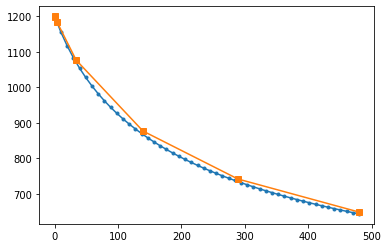

In [40]:
# Define derivative function
def f(t,y):
  k = 2.2067e-12
  a = 81e8
  return -k*(y**4 - a)

sol = solve_ivp(f, [0,480],[1200]   )
t_ivp = sol.t
y_ivp = sol.y[0]


t = np.linspace(0, 480, 50)
y = euler(f,t,1200)
plt.plot(t,y,'.-')
plt.plot(t_ivp,y_ivp,'s-',label='IVP')

# The t_eval Trick
RK45 is amazingly good at solving problems in a small number of steps, but what if we **want** lots of steps to make a smooth plot?  We can do this easily with *t_eval*

Solutions:
Default:	 1.5927186061203615
t_eval :	 1.592718606120357


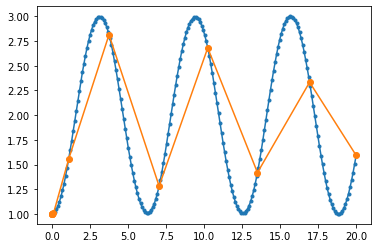

In [64]:
def f(t,y):
  return np.sin(t)

sol = solve_ivp(f, [0,20], [1])
t_ivp = sol.t
y_ivp = sol.y[0]

t = np.linspace(0,20,num=200) # Define time axis
sol = solve_ivp(f, [0,20], [1], t_eval=t)  # Use t_eval!
t_ivp2 = sol.t
y_ivp2 = sol.y[0]

print('Solutions')
print('Default:\t', y_ivp[-1])
print('t_eval :\t', y_ivp2[-1])

plt.plot(t_ivp2, y_ivp2,'.-')
plt.plot(t_ivp, y_ivp,'o-')
plt.show()

# EXAMPLE 3 - Free Fall
2nd (or higher) order problems are solved by "unrolling" into a N first-order equations

Solve the free fall problem:  $y'' = -g$

Define $y_0 = y(t),  y_1 = y'(t)$.  The derivative function returns both $y_0' = y_1$ and $y_1' = y'' = -g$.

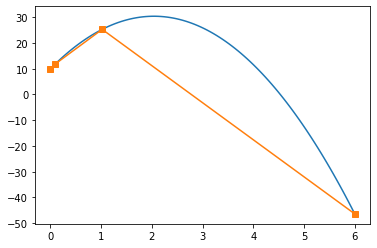

In [41]:
def f(t,y):
  y0 = y[0]
  y1 = y[1]
  return [y1, -9.8] 

tf = 6
y0 = 10
v0 = 20
sol = solve_ivp(f, [0,tf],[y0, v0]   )
t_ivp = sol.t
y_ivp = sol.y[0]

# Exact solution
t = np.linspace(0, tf, 100)
y = y0 + v0*t - 0.5*9.8*t**2

plt.plot(t,y,'-')
plt.plot(t_ivp,y_ivp,'s-',label='IVP')
plt.show()